<a href="https://colab.research.google.com/github/ellieyakim0829/dataAnalysis/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%9D%B8%EA%B8%B0%EB%8F%84%EC%84%9C_10_20%EB%8C%80_%EA%B9%80%EC%8A%B9%EB%AF%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## OpenAPI를 이용한 데이터 수집

### #그래프에서 한글사용하는 방법
- **(코랩에서)한글폰트 설치하기**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

- **한글 폰트 지정하기**

In [ ]:
# 코랩에서 한글 폰트 종류와 이름이 win과 다를 수 있다!!!
# 코랩: NanumGothic, 윈도우: Malgun Gothic
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'NanumBarunGothic',
                     'font.size': 12,
                     'figure.figsize': (6, 4),
                     'axes.unicode_minus':  False }) # 폰트 설정

---

#### 1.도서관 정보나루  OpenAPI 신청하기
*  도서관 데이터 제공, 신청 활용 가능
    - 오픈 API 활용 방법: https://www.data4library.kr/apiUtilization
    - OpenAPI 신청하기: https://www.data4library.kr/myPage?isValid=true

#### 도서관 정보나루 API 사용하여 데이터 수집하기

In [ ]:
# requests 설치
!pip install requests

In [ ]:
import requests
import xml.etree.ElementTree as ET #Python의 표준 라이브러리 중 하나로 XML 데이터를 파싱하고, XML 트리를 생성하고, XML 문서를 생성하는 기능

# URL 설정
url = "http://data4library.kr/api/loanItemSrch?authKey=b8604a40cf9f0ce1e10c1d20ac9c70e6b6ddf0a5b7b751370b67131552680c20&startDt=2024-01-01&endDt=2024-04-30&age=14;20&region=11"

# GET 요청을 보내고 응답 받기.
r = requests.get(url)
print(r)

# 응답의 인코딩을 UTF-8로 설정.
r.encoding = 'UTF-8'

# 응답을 XML 형식으로 파싱.
tree = ET.fromstring(r.text)
print(tree)

<Response [200]>
<Element 'response' at 0x7a7a1e39a2f0>


In [ ]:
import requests  # HTTP 요청을 보내고 응답을 받는 데 사용하는 모듈.
import xml.etree.ElementTree as ET  # XML 데이터를 파싱하는 데 사용하는 모듈
from urllib.parse import urlparse, parse_qs  # URL을 구문 분석하고 쿼리 문자열을 추출하는 데 사용하는 함수

url = 'http://data4library.kr/api/loanItemSrch?authKey=b8604a40cf9f0ce1e10c1d20ac9c70e6b6ddf0a5b7b751370b67131552680c20&startDt=2024-01-01&endDt=2024-04-30&age=14;20&region=11'

# URL을 파싱하여 쿼리 문자열의 매개변수를 가져오기.
parsed_url = urlparse(url)
query_params = parse_qs(parsed_url.query)

# 각 매개변수의 값을 가져오기
gender = query_params.get('gender', [''])[0]
age = query_params.get('age', [''])[0]
addCode = query_params.get('addCode', [''])[0]
kdc = query_params.get('kdc', [''])[0]
region = query_params.get('region', [''])[0]

print("Gender:", gender)
print("Age:", age)
print("Add Code:", addCode)
print("KDC:", kdc)
print("Region:", region)

# URL에서 XML 데이터를 추출.
response = requests.get(url)

# 응답의 텍스트를 XML 문자열로 변환.
xml_data = response.text

# XML 문자열을 파싱.
root = ET.fromstring(xml_data)

# 각 도서 정보에 접근하여 출력.
for doc in root.findall('docs/doc'):
    bookname = doc.find('bookname').text
    ranking = doc.find('ranking').text
    authors = doc.find('authors').text
    publisher = doc.find('publisher').text
    publication_year = doc.find('publication_year').text
    isbn13 = doc.find('isbn13').text
    loan_count = doc.find('loan_count').text
    print("도서명:", bookname)
    print("순위",ranking)
    print("저자:", authors)
    print("출판사:", publisher)
    print("출판년도:", publication_year)
    print("ISBN:", isbn13)
    print("대출 횟수:", loan_count)
    print("-----")

Gender: 
Age: 14;20
Add Code: 
KDC: 
Region: 11
도서명: 물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기
순위 1
저자: 룰루 밀러 지음 ;정지인 옮김
출판사: 곰출판
출판년도: 2021
ISBN: 9791189327156
대출 횟수: 592
-----
도서명: 지구 끝의 온실 :김초엽 장편소설
순위 2
저자: 지은이: 김초엽
출판사: Giant Books(자이언트북스)
출판년도: 2021
ISBN: 9791191824001
대출 횟수: 550
-----
도서명: 우리가 빛의 속도로 갈 수 없다면 :김초엽 소설
순위 3
저자: 지은이: 김초엽
출판사: 허블
출판년도: 2019
ISBN: 9791190090018
대출 횟수: 435
-----
도서명: 달러구트 꿈 백화점 :이미예 장편소설
순위 4
저자: 지은이: 이미예
출판사: 팩토리나인
출판년도: 2020
ISBN: 9791165341909
대출 횟수: 412
-----
도서명: 종의 기원 =정유정 장편소설 /The origin of species
순위 5
저자: 지은이: 정유정
출판사: 은행나무
출판년도: 2016
ISBN: 9788956609959
대출 횟수: 404
-----
도서명: 채식주의자:한강 연작소설
순위 6
저자: 한강
출판사: 창비
출판년도: 2007
ISBN: 9788936433598
대출 횟수: 399
-----
도서명: 천 개의 파랑 :천선란 장편소설
순위 7
저자: 지은이: 천선란
출판사: 허블
출판년도: 2020
ISBN: 9791190090261
대출 횟수: 387
-----
도서명: 칵테일, 러브, 좀비
순위 8
저자: 지은이: 조예은
출판사: 안전가옥
출판년도: 2020
ISBN: 9791190174756
대출 횟수: 373
-----
도서명: 밝은 밤 :최은영 장편소설
순위 9
저자: 지은이: 최은영
출판사: 문학동네
출판년도: 2021
ISBN: 9788954681179
대출 횟수: 366
-----
도

In [ ]:
import requests  # HTTP 요청을 보내고 응답을 받는 데 사용하는 모듈.
import xml.etree.ElementTree as ET  # XML 데이터를 파싱하는 데 사용하는 모듈
from urllib.parse import urlparse, parse_qs  # URL을 구문 분석하고 쿼리 문자열을 추출하는 데 사용하는 함수
import pandas as pd

url = 'http://data4library.kr/api/loanItemSrch?authKey=b8604a40cf9f0ce1e10c1d20ac9c70e6b6ddf0a5b7b751370b67131552680c20&startDt=2024-01-01&endDt=2024-04-30&age=14;20&region=11'

# URL에서 XML 데이터 추출
response = requests.get(url)

# XML 데이터를 파싱하여 ElementTree 객체로 변환
root = ET.fromstring(response.content)

# 'request' 요소에서 매개변수 정보를 추출하여 딕셔너리에 저장
params_data = {
    '연령': root.find('.//request/age').text,
    '지역': root.find('.//request/region').text
    }

# 매개변수 정보를 DataFrame으로 변환
params_df = pd.DataFrame([params_data])

# 도서 정보를 저장할 리스트 초기화
books = []

# 각 도서 정보에 접근하여 리스트에 추가
for doc in root.findall('.//docs/doc'):
    bookname = doc.find('bookname').text
    ranking = doc.find('ranking').text
    authors = doc.find('authors').text
    publisher = doc.find('publisher').text
    publication_year = doc.find('publication_year').text
    isbn13 = doc.find('isbn13').text
    class_nm = doc.find('class_nm').text
    loan_count = doc.find('loan_count').text
    bookImageURL = doc.find('bookImageURL').text
    bookDtlUrl = doc.find('bookDtlUrl').text

    books.append({
        '도서명': bookname,
        '순위': ranking,
        '저자': authors,
        '출판사': publisher,
        '출판년도': publication_year,
        'ISBN': isbn13,
        '주제분류명':class_nm,
        '대출 횟수': loan_count,
        '책표지': bookImageURL,
        '도서상세페이지 URL': bookDtlUrl
    })

# 도서 정보를 DataFrame으로 변환
books_df = pd.DataFrame(books)

# 매개변수 정보와 도서 정보를 가로 방향으로 결합하여 하나의 DataFrame으로 만듭니다.
result_df = pd.concat([params_df, books_df], axis=1)
result_df.head(5)
# # 결과 DataFrame 출력
# print(result_df)

,연령,지역,도서명,순위,저자,출판사,출판년도,ISBN,주제분류명,대출 횟수,책표지,도서상세페이지 URL
0,14;20,11,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",1,룰루 밀러 지음 ;정지인 옮김,곰출판,2021,9791189327156,자연과학 > 동물학 > 동물학,592,https://image.aladin.co.kr/product/28465/73/co...,https://data4library.kr/bookV?seq=6360937
1,NaN,NaN,지구 끝의 온실 :김초엽 장편소설,2,지은이: 김초엽,Giant Books(자이언트북스),2021,9791191824001,문학 > 한국문학 > 소설,550,https://image.aladin.co.kr/product/27692/63/co...,https://data4library.kr/bookV?seq=6065686
2,NaN,NaN,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,3,지은이: 김초엽,허블,2019,9791190090018,문학 > 한국문학 > 소설,435,https://image.aladin.co.kr/product/19359/16/co...,https://data4library.kr/bookV?seq=5430429
3,NaN,NaN,달러구트 꿈 백화점 :이미예 장편소설,4,지은이: 이미예,팩토리나인,2020,9791165341909,문학 > 한국문학 > 소설,412,https://image.aladin.co.kr/product/24512/70/co...,https://data4library.kr/bookV?seq=5707051
4,NaN,NaN,종의 기원 =정유정 장편소설 /The origin of species,5,지은이: 정유정,은행나무,2016,9788956609959,문학 > 한국문학 > 소설,404,http://image.aladin.co.kr/product/7492/9/cover...,https://data4library.kr/bookV?seq=3151708


In [ ]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   연령           1 non-null      object
 1   지역           1 non-null      object
 2   도서명          200 non-null    object
 3   순위           200 non-null    object
 4   저자           199 non-null    object
 5   출판사          200 non-null    object
 6   출판년도         200 non-null    object
 7   ISBN         200 non-null    object
 8   주제분류명        196 non-null    object
 9   대출 횟수        200 non-null    object
 10  책표지          200 non-null    object
 11  도서상세페이지 URL  200 non-null    object
dtypes: object(12)
memory usage: 18.9+ KB


In [ ]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd

url = 'http://data4library.kr/api/loanItemSrch?authKey=b8604a40cf9f0ce1e10c1d20ac9c70e6b6ddf0a5b7b751370b67131552680c20&startDt=2024-01-01&endDt=2024-04-30&age=14;20&region=11'

# URL에서 XML 데이터 추출
response = requests.get(url)

# XML 데이터를 파싱하여 ElementTree 객체로 변환
root = ET.fromstring(response.content)

# 도서 정보를 저장할 리스트 초기화
books = []

# 각 도서 정보에 접근하여 리스트에 추가
for doc in root.findall('.//docs/doc'):
    ranking = doc.find('ranking').text
    bookname = doc.find('bookname').text
    ranking = doc.find('ranking').text
    authors = doc.find('authors').text
    publisher = doc.find('publisher').text
    publication_year = doc.find('publication_year').text
    isbn13 = doc.find('isbn13').text
    class_nm = doc.find('class_nm').text
    loan_count = doc.find('loan_count').text
    bookImageURL = doc.find('bookImageURL').text
    bookDtlUrl = doc.find('bookDtlUrl').text

    books.append({
        '순위': ranking,
        '도서명': bookname,
        '순위': ranking,
        '저자': authors,
        '출판사': publisher,
        '출판년도': publication_year,
        'ISBN': isbn13,
        '주제분류명':class_nm,
        '대출 횟수': loan_count,
        '책표지': bookImageURL,
        '도서상세페이지 URL': bookDtlUrl
    })

# 도서 정보를 DataFrame으로 변환
books_df = pd.DataFrame(books)
books_df.head(5)
# DataFrame 출력
# print(books_df)

,순위,도서명,저자,출판사,출판년도,ISBN,주제분류명,대출 횟수,책표지,도서상세페이지 URL
0,1,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",룰루 밀러 지음 ;정지인 옮김,곰출판,2021,9791189327156,자연과학 > 동물학 > 동물학,592,https://image.aladin.co.kr/product/28465/73/co...,https://data4library.kr/bookV?seq=6360937
1,2,지구 끝의 온실 :김초엽 장편소설,지은이: 김초엽,Giant Books(자이언트북스),2021,9791191824001,문학 > 한국문학 > 소설,550,https://image.aladin.co.kr/product/27692/63/co...,https://data4library.kr/bookV?seq=6065686
2,3,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018,문학 > 한국문학 > 소설,435,https://image.aladin.co.kr/product/19359/16/co...,https://data4library.kr/bookV?seq=5430429
3,4,달러구트 꿈 백화점 :이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909,문학 > 한국문학 > 소설,412,https://image.aladin.co.kr/product/24512/70/co...,https://data4library.kr/bookV?seq=5707051
4,5,종의 기원 =정유정 장편소설 /The origin of species,지은이: 정유정,은행나무,2016,9788956609959,문학 > 한국문학 > 소설,404,http://image.aladin.co.kr/product/7492/9/cover...,https://data4library.kr/bookV?seq=3151708


In [ ]:
!pip install missingno

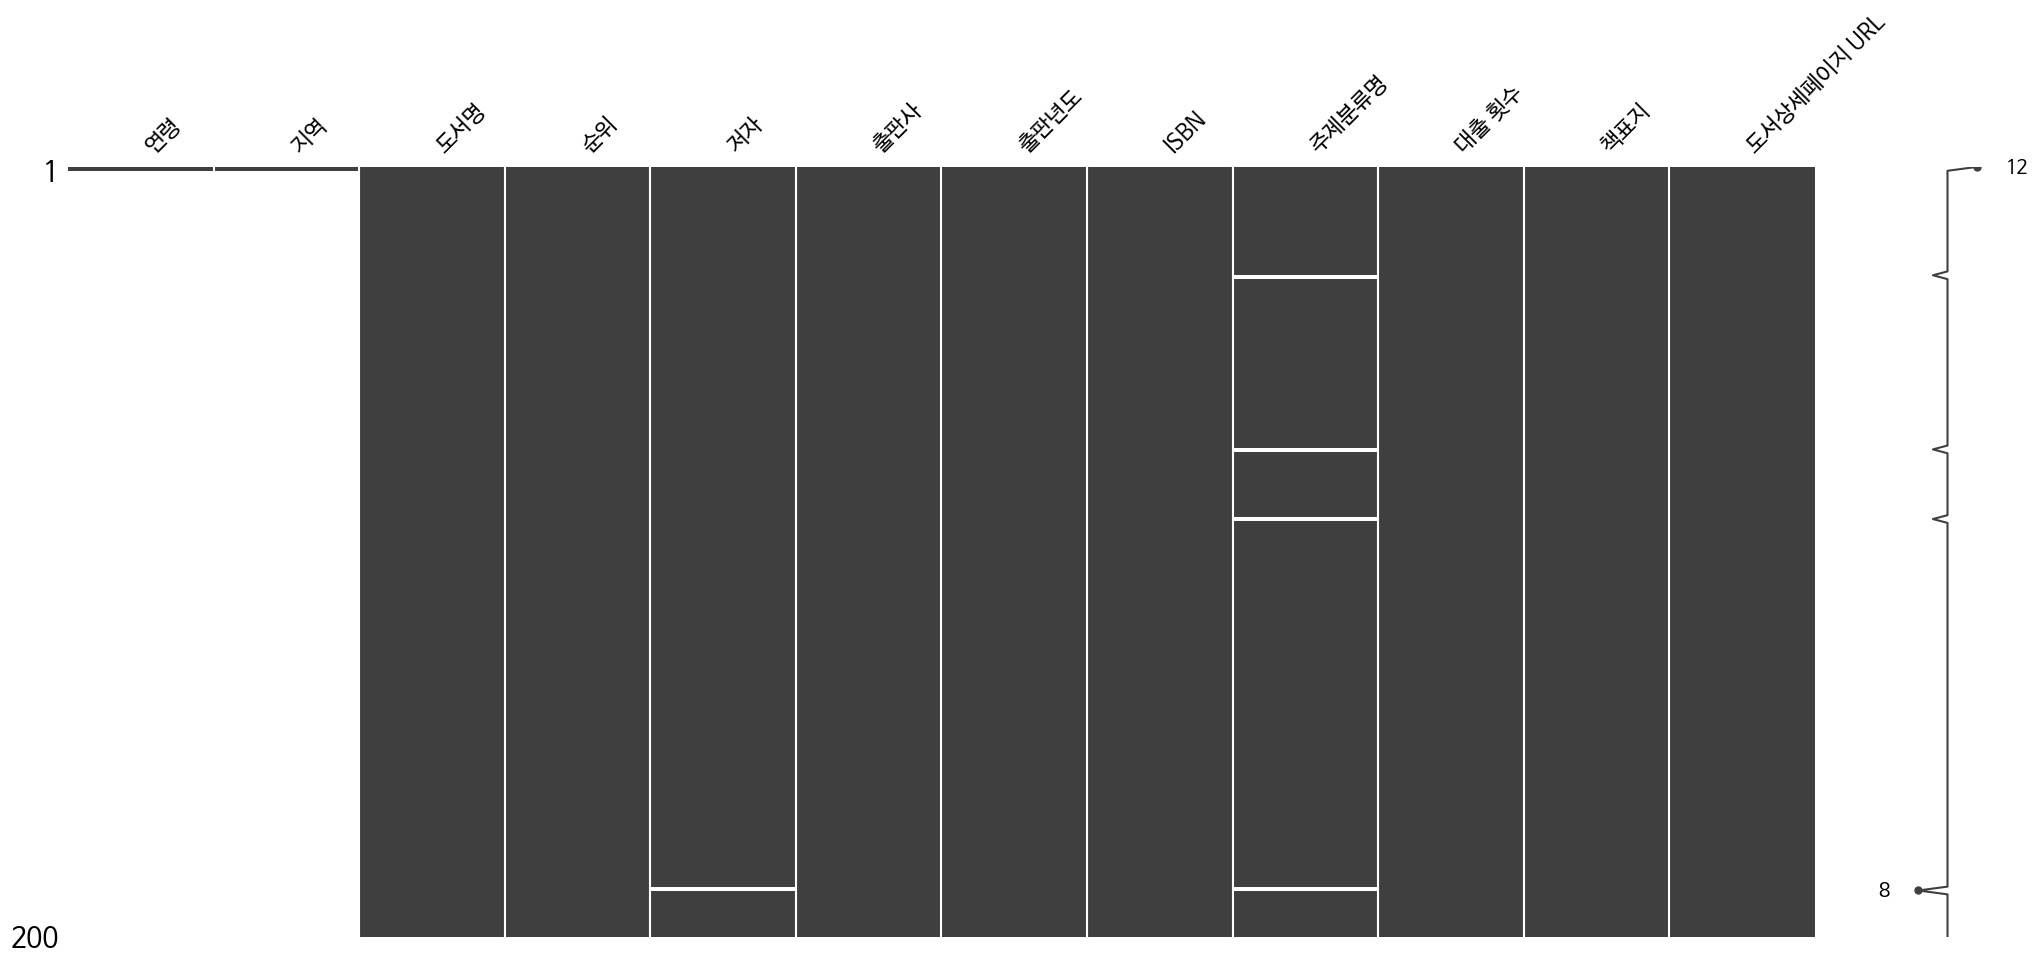

In [ ]:
import missingno as msno
msno.matrix(result_df)
plt.show()

# 현재 DataFrame의 열 이름 확인

In [ ]:
print(f"현재 DataFrame의 열 이름:, {result_df.columns}")
result_df.head(3)

현재 DataFrame의 열 이름:, Index(['연령', '지역', '도서명', '순위', '저자', '출판사', '출판년도', 'ISBN', '주제분류명', '대출 횟수',
       '책표지', '도서상세페이지 URL'],
      dtype='object')


,연령,지역,도서명,순위,저자,출판사,출판년도,ISBN,주제분류명,대출 횟수,책표지,도서상세페이지 URL
0,14;20,11,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",1,룰루 밀러 지음 ;정지인 옮김,곰출판,2021,9791189327156,자연과학 > 동물학 > 동물학,592,https://image.aladin.co.kr/product/28465/73/co...,https://data4library.kr/bookV?seq=6360937
1,NaN,NaN,지구 끝의 온실 :김초엽 장편소설,2,지은이: 김초엽,Giant Books(자이언트북스),2021,9791191824001,문학 > 한국문학 > 소설,550,https://image.aladin.co.kr/product/27692/63/co...,https://data4library.kr/bookV?seq=6065686
2,NaN,NaN,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,3,지은이: 김초엽,허블,2019,9791190090018,문학 > 한국문학 > 소설,435,https://image.aladin.co.kr/product/19359/16/co...,https://data4library.kr/bookV?seq=5430429


# 도서명에서 중복되는 값 제거 하기

In [ ]:
# 중복 되지 않은 값의 개수와  책 이름을 확인
# print( f'#고유한 값 갯수:{len(books_df.도서명.unique())}' )
# print( f'#고유한 책 이름명:{books_df.도서명.unique()}' )

# '도서명' 열에서 중복되지 않는 고유한 값들을 추출하여 unique_books 변수에 저장
unique_books = books_df['도서명'].unique()
print(len(unique_books))

# # '도서명' 열을 기준으로 중복된 값을 제거하고 고유한 값들을 추출하여 unique_books_df 변수에 저장 새로운 DataFrame을 생성
unique_books_df = books_df.drop_duplicates(subset=['도서명'])
print(len(unique_books_df))
unique_books_df.head(10)


# import pandas as pd

# # books_df 데이터프레임 생성
# books_df = pd.DataFrame(books)
# books_df.head()
# # print(books_df)

# # 중복된 값 찾기
# # duplicates = books_df.duplicated('도서명')

# # # # # 중복된 값의 수 출력
# # print(f"중복된 값의 책이름: {duplicates}")
# # print(f"중복된 값의 책 개수: {duplicates.sum()}")

# # # # 중복된 행 출력
# # duplicate_rows = books_df[duplicates]
# # print(duplicate_rows)
# # duplicates_book = pd.DataFrame(books_df)
# # duplicates_book


192
192


,순위,도서명,저자,출판사,출판년도,ISBN,주제분류명,대출 횟수,책표지,도서상세페이지 URL
0,1,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",룰루 밀러 지음 ;정지인 옮김,곰출판,2021,9791189327156,자연과학 > 동물학 > 동물학,592,https://image.aladin.co.kr/product/28465/73/co...,https://data4library.kr/bookV?seq=6360937
1,2,지구 끝의 온실 :김초엽 장편소설,지은이: 김초엽,Giant Books(자이언트북스),2021,9791191824001,문학 > 한국문학 > 소설,550,https://image.aladin.co.kr/product/27692/63/co...,https://data4library.kr/bookV?seq=6065686
2,3,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018,문학 > 한국문학 > 소설,435,https://image.aladin.co.kr/product/19359/16/co...,https://data4library.kr/bookV?seq=5430429
3,4,달러구트 꿈 백화점 :이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909,문학 > 한국문학 > 소설,412,https://image.aladin.co.kr/product/24512/70/co...,https://data4library.kr/bookV?seq=5707051
4,5,종의 기원 =정유정 장편소설 /The origin of species,지은이: 정유정,은행나무,2016,9788956609959,문학 > 한국문학 > 소설,404,http://image.aladin.co.kr/product/7492/9/cover...,https://data4library.kr/bookV?seq=3151708
5,6,채식주의자:한강 연작소설,한강,창비,2007,9788936433598,문학 > 한국문학 > 소설,399,https://bookthumb-phinf.pstatic.net/cover/033/...,https://data4library.kr/bookV?seq=2155671
6,7,천 개의 파랑 :천선란 장편소설,지은이: 천선란,허블,2020,9791190090261,문학 > 한국문학 > 소설,387,https://image.aladin.co.kr/product/24895/69/co...,https://data4library.kr/bookV?seq=5738747
7,8,"칵테일, 러브, 좀비",지은이: 조예은,안전가옥,2020,9791190174756,문학 > 한국문학 > 소설,373,https://image.aladin.co.kr/product/23736/85/co...,https://data4library.kr/bookV?seq=5650149
8,9,밝은 밤 :최은영 장편소설,지은이: 최은영,문학동네,2021,9788954681179,문학 > 한국문학 > 소설,366,https://image.aladin.co.kr/product/27541/91/co...,https://data4library.kr/bookV?seq=6045915
9,10,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2021,9791161571188,문학 > 한국문학 > 소설,361,https://image.aladin.co.kr/product/26942/84/co...,https://data4library.kr/bookV?seq=5962217


#### 가공된 파일 신규 저장하기

In [ ]:
# 가공된 데이터 신규 파일로 저장하기
outfile = 'BestLoanList_books_data_10_20.csv'
unique_books_df.to_csv(outfile, encoding='cp949', mode='w', index=False)

#### 가공된 csv 파일 확인하기

In [ ]:
unique_books_df = pd.read_csv('BestLoanList_books_data_10_20.csv', encoding='cp949')

print(f"현재 DataFrame의 열 이름:, {unique_books_df.columns}")
unique_books_df.head(10)

현재 DataFrame의 열 이름:, Index(['순위', '도서명', '저자', '출판사', '출판년도', 'ISBN', '주제분류명', '대출 횟수', '책표지',
       '도서상세페이지 URL'],
      dtype='object')


,순위,도서명,저자,출판사,출판년도,ISBN,주제분류명,대출 횟수,책표지,도서상세페이지 URL
0,1,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",룰루 밀러 지음 ;정지인 옮김,곰출판,2021,9791189327156,자연과학 > 동물학 > 동물학,592,https://image.aladin.co.kr/product/28465/73/co...,https://data4library.kr/bookV?seq=6360937
1,2,지구 끝의 온실 :김초엽 장편소설,지은이: 김초엽,Giant Books(자이언트북스),2021,9791191824001,문학 > 한국문학 > 소설,550,https://image.aladin.co.kr/product/27692/63/co...,https://data4library.kr/bookV?seq=6065686
2,3,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018,문학 > 한국문학 > 소설,435,https://image.aladin.co.kr/product/19359/16/co...,https://data4library.kr/bookV?seq=5430429
3,4,달러구트 꿈 백화점 :이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909,문학 > 한국문학 > 소설,412,https://image.aladin.co.kr/product/24512/70/co...,https://data4library.kr/bookV?seq=5707051
4,5,종의 기원 =정유정 장편소설 /The origin of species,지은이: 정유정,은행나무,2016,9788956609959,문학 > 한국문학 > 소설,404,http://image.aladin.co.kr/product/7492/9/cover...,https://data4library.kr/bookV?seq=3151708
5,6,채식주의자:한강 연작소설,한강,창비,2007,9788936433598,문학 > 한국문학 > 소설,399,https://bookthumb-phinf.pstatic.net/cover/033/...,https://data4library.kr/bookV?seq=2155671
6,7,천 개의 파랑 :천선란 장편소설,지은이: 천선란,허블,2020,9791190090261,문학 > 한국문학 > 소설,387,https://image.aladin.co.kr/product/24895/69/co...,https://data4library.kr/bookV?seq=5738747
7,8,"칵테일, 러브, 좀비",지은이: 조예은,안전가옥,2020,9791190174756,문학 > 한국문학 > 소설,373,https://image.aladin.co.kr/product/23736/85/co...,https://data4library.kr/bookV?seq=5650149
8,9,밝은 밤 :최은영 장편소설,지은이: 최은영,문학동네,2021,9788954681179,문학 > 한국문학 > 소설,366,https://image.aladin.co.kr/product/27541/91/co...,https://data4library.kr/bookV?seq=6045915
9,10,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2021,9791161571188,문학 > 한국문학 > 소설,361,https://image.aladin.co.kr/product/26942/84/co...,https://data4library.kr/bookV?seq=5962217


##대출건수를 계산할 때 각 책을 구분할 수 있는 고유한 식별자가 주어짐
## - 가장 일반적인 고유한 식별자는 ISBN (International Standard Book Number)  활용하여 대출건수를 계산하면 된다.

##### * 1.먼저, 데이터를 읽어올 때 ISBN 컬럼을 사용하여 DataFrame을 생성하기
##### * 2.도서명 대신 ISBN을 사용하여 각 책의 대출건수를 계산.
##### * 3.필요에 따라 ISBN을 인덱스로 설정하여 데이터를 재구성.
##### * 4.이후에 대출건수 순위를 계산하고 시각화하기.

In [ ]:
# import pandas as pd

# # ISBN과 대출 횟수를 포함한 데이터 파일을 불러옵니다.
# books_data = pd.read_csv('BestLoanList_books_data.csv', encoding='cp949')
# print(books_data)

# # ISBN을 기준으로 대출 횟수와 도서명을 포함한 데이터를 생성.
books_with_loan_count = unique_books_df[['ISBN','대출 횟수', '도서명']]

# ISBN을 인덱스로 설정.
books_with_loan_count.set_index('ISBN', inplace=True)

# 대출 횟수에 따라 정렬한 뒤 상위 10개의 도서 생성.
top_10_books_with_loan_count = books_with_loan_count.sort_values(by='대출 횟수', ascending=False).head(10)

# 결과를 확인.
print(top_10_books_with_loan_count)
top_10_books_with_loan_count

               대출 횟수                                            도서명
ISBN                                                               
9791189327156    592  물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기
9791191824001    550                             지구 끝의 온실 :김초엽 장편소설
9791190090018    435                     우리가 빛의 속도로 갈 수 없다면 :김초엽 소설
9791165341909    412                           달러구트 꿈 백화점 :이미예 장편소설
9788956609959    404         종의 기원 =정유정 장편소설 /The origin of species
9788936433598    399                                  채식주의자:한강 연작소설
9791190090261    387                              천 개의 파랑 :천선란 장편소설
9791190174756    373                                    칵테일, 러브, 좀비
9788954681179    366                                 밝은 밤 :최은영 장편소설
9791161571188    361                              불편한 편의점 :김호연 장편소설


,대출 횟수,도서명
ISBN,,
9791189327156,592,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기"
9791191824001,550,지구 끝의 온실 :김초엽 장편소설
9791190090018,435,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설
9791165341909,412,달러구트 꿈 백화점 :이미예 장편소설
9788956609959,404,종의 기원 =정유정 장편소설 /The origin of species
9788936433598,399,채식주의자:한강 연작소설
9791190090261,387,천 개의 파랑 :천선란 장편소설
9791190174756,373,"칵테일, 러브, 좀비"
9788954681179,366,밝은 밤 :최은영 장편소설


# 막대 그래프로 표시하기

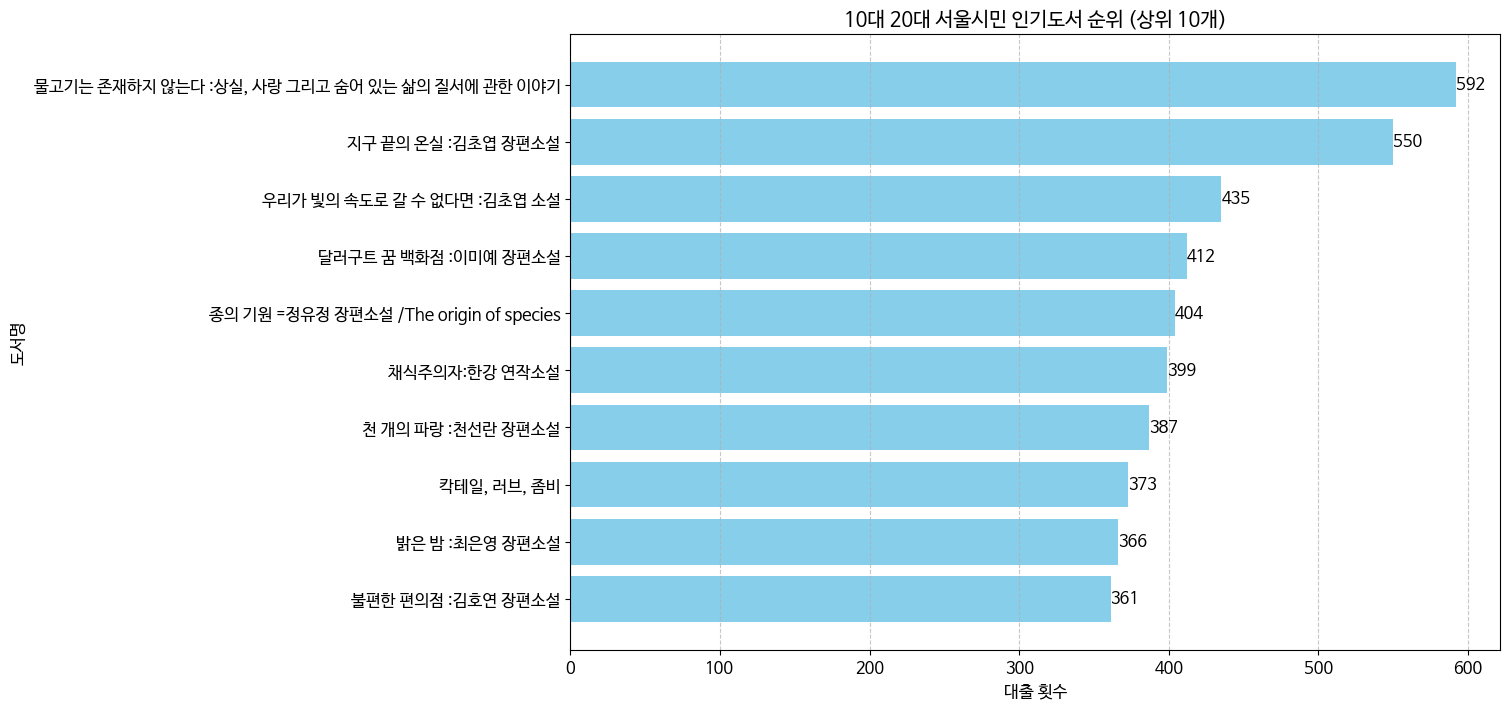

In [ ]:
import matplotlib.pyplot as plt

# 상위 10개의 도서명과 대출 횟수를 추출합니다.
books_names = top_10_books_with_loan_count['도서명']
loan_counts = top_10_books_with_loan_count['대출 횟수']

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))  # 그래프 크기 설정
plt.barh(books_names, loan_counts, color='skyblue')  # 가로 막대 그래프 그리기
plt.xlabel('대출 횟수')
plt.ylabel('도서명')
plt.title('10대 20대 서울시민 인기도서 순위 (상위 10개)')
plt.gca().invert_yaxis()  # y 축 역순으로 변경하여 1위가 위로 오도록 설정

# 각 막대에 대출 횟수 표시
for i, v in enumerate(loan_counts):
    plt.text(v, i, str(v), color='black', va='center')

# 그래프 테마 설정
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 그래프를 파일로 저장
plt.savefig('10대 20대 서울시민 인기도서_10개_막대그래프.png')

# 그래프 보여주기
plt.show()

# Pie 그래프로 표시하기

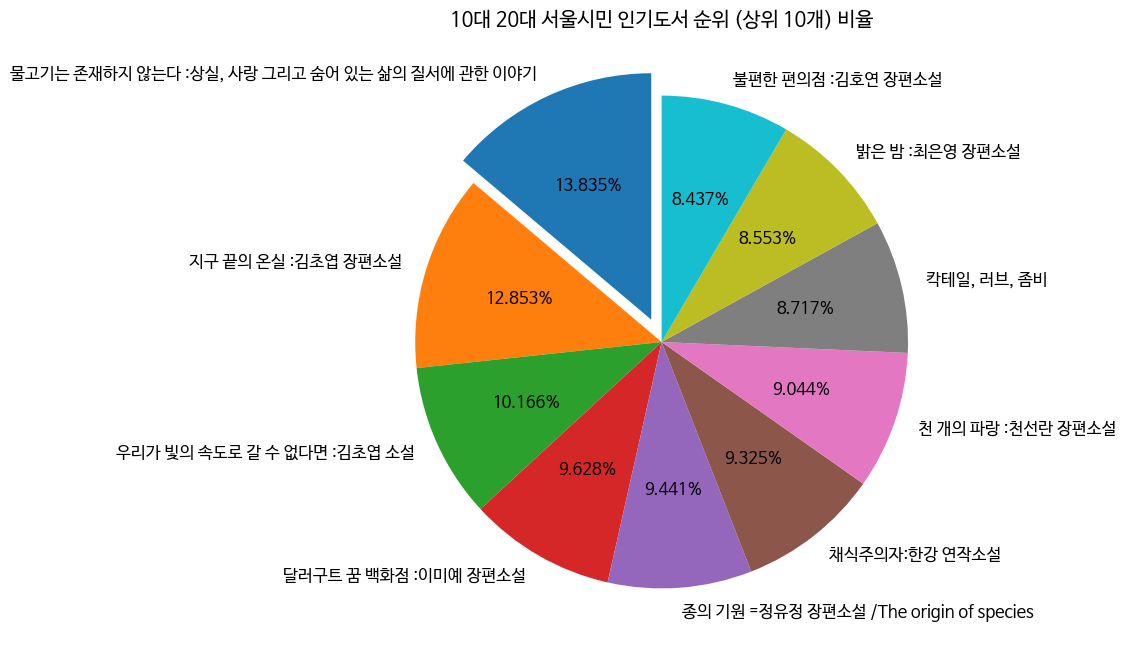

In [ ]:
# import matplotlib.pyplot as plt

# # 상위 10개의 도서명과 해당 도서의 비율(퍼센트) 계산
# top_10_books = top_10_books_with_loan_count['도서명'].head(10)
# book_percentages = (top_10_books_with_loan_count['대출 횟수'].value_counts(normalize=True) * 100).head(10)
# print(top_10_books)
# print(book_percentages)
# # 파이 그래프로 나타내기
# # plt.figure(figsize=(8, 8))
# # plt.pie(book_percentages, labels=top_10_books, autopct='%.3f%%', startangle=90, explode=[0.1]+[0]*9)
# # plt.title('30대 40대 50대 서울시민 인기도서 순위 (상위 10개) 비율')
# # plt.show()

import matplotlib.pyplot as plt

# 상위 10개의 도서명과 해당 도서의 비율(퍼센트) 계산
top_10_books = top_10_books_with_loan_count['도서명'].head(10)
book_percentages = (top_10_books_with_loan_count['대출 횟수'] / top_10_books_with_loan_count['대출 횟수'].sum() * 100).head(10)

# 파이 그래프로 나타내기
plt.figure(figsize=(8, 8))
plt.pie(book_percentages, labels=top_10_books, autopct='%.3f%%', startangle=90, explode=[0.1]+[0]*9)
plt.title('10대 20대 서울시민 인기도서 순위 (상위 10개) 비율')

# 파일로 저장
plt.savefig('10대 20대 서울시민 인기도서_10개_비율_파이그래프.png')

plt.show()

In [ ]:
# 라이브러리 설치하기
!pip install wordcloud

# 워드 클라우드 만들기

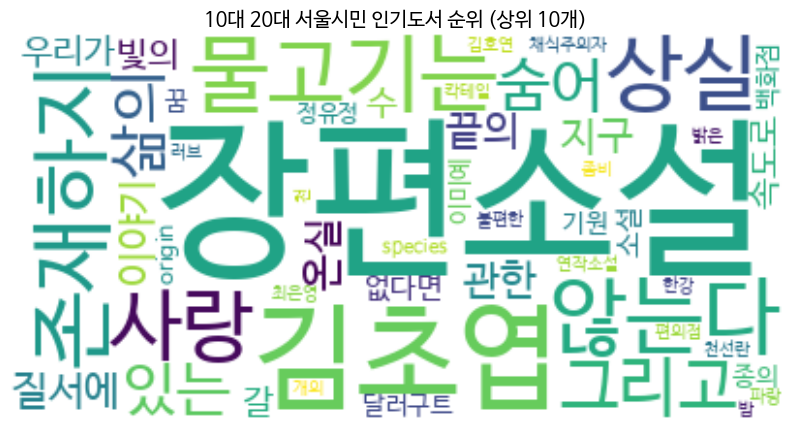

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 상위 10개의 도서명 추출
top_10_books_names = top_10_books_with_loan_count['도서명'].head(10)

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='NanumBarunGothic.ttf', background_color='white').generate(' '.join(top_10_books_names))

# 워드 클라우드 표시
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('10대 20대 서울시민 인기도서 순위 (상위 10개) ')
plt.axis('off')
plt.show()

# 파일로 저장하기
wordcloud.to_file('10대 20대 서울시민 인기도서_10개_워드클라우드.png')

-------------------------

In [ ]:
from IPython.display import Image
Image(url='https://image.aladin.co.kr/product/28465/73/cover/k092835920_1.jpg')

In [ ]:
import requests
from io import BytesIO
from PIL import Image

# 다운받을 이미지 url
urls = [
    "https://image.aladin.co.kr/product/27692/63/cover/k082733434_1.jpg",
    "https://image.aladin.co.kr/product/19359/16/cover/s972635417_1.jpg"
]
# 파일로 저장하기
for idx, url in enumerate(urls):
    res = requests.get(url)
    print(res.content)
    img = Image.open(BytesIO(res.content))    # 응답결과(res.content)바이트파일 이미지 파일로 오픈
    img.save(f'./testimg_{idx}.png', 'png')   # 'png'이미지로(만) 저장

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xed\x00$Photoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\x08\x1c\x02x\x00\x03384\xff\xdb\x00C\x00\x04\x02\x03\x03\x03\x02\x04\x03\x03\x03\x04\x04\x04\x04\x05\t\x06\x05\x05\x05\x05\x0b\x08\x08\x06\t\r\x0b\r\r\r\x0b\x0c\x0c\x0e\x10\x14\x11\x0e\x0f\x13\x0f\x0c\x0c\x12\x18\x12\x13\x15\x16\x17\x17\x17\x0e\x11\x19\x1b\x19\x16\x1a\x14\x16\x17\x16\xff\xdb\x00C\x01\x04\x04\x04\x05\x05\x05\n\x06\x06\n\x16\x0f\x0c\x0f\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\xff\xc2\x00\x11\x08\x01(\x00\xc8\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00\x01\x03\x04\x06\x02\x07\x08\xff\xc4\x00\x1b\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x02\x04\x05\x01\x06\x07\xff\xda\x00\x

In [ ]:
# 이미지 다운로드 하기
import pandas as pd
import requests
from io import BytesIO
from PIL import Image
import time
import os

# 자신에게 맞게 폴더/파일 위치 정보를 수정한다.
FILE = f'./BestLoanList_books_data_10_20.csv'  # 앞에서 자신이 검색한 쇼핑 파일
ImgFolder = f'./download/'      # 다운받을 이미지 폴더
MAX = 10                              # 이미지 파일 다운로드 건수

def getImageUrl(file):
    print(f'읽은 파일명: {file}')
    df = pd.read_csv(file, encoding='cp949') # 이미지가 있는 쇼핑 파일 불러오기
    return df['책표지'].to_list()

def createDirectory(directory): # 다운받을 이미지 폴더 만들기
    try:
        if not os.path.exists(directory):
            print(f'{directory} 폴더가 생성되었습니다.')
            os.makedirs(directory)
        print(f'이미지 폴더 위치 : {directory}')
    except OSError:
        print("Error: Failed to create the directory.")

def downloadImageFile(urls, imgfolder):
    start = time.time()             # 이미지 다운로드 속도 time check
    for idx, url in enumerate(urls):
        if idx == MAX:
            break  # MAX 건수만 처리하기
        res = requests.get(url)     # request.get 요청
#         print(f'[{idx+1:2>}][{time.time() - start}] : {url}')  # 이미지 다운로드 시간 체크
        print(f'[{idx+1:0>2}] : {url}')  # 이미지 다운로드 시간 체크
        img = Image.open(BytesIO(res.content))  #Img open
        img.save(f'{imgfolder}testimage_{idx}.png', 'png')
    return idx


urls = getImageUrl(FILE)                # 이미지 URL 목록 가져오기
createDirectory(ImgFolder)              # 다운받을 이미지 폴더 만들기
totalcnt = downloadImageFile(urls, ImgFolder)      # 이미지 다운로드하기
print(f'총 다운로드 건수: {totalcnt}')

읽은 파일명: ./BestLoanList_books_data.csv
./download/ 폴더가 생성되었습니다.
이미지 폴더 위치 : ./download/
[01] : https://image.aladin.co.kr/product/26942/84/cover/k582730818_1.jpg
[02] : https://image.aladin.co.kr/product/30048/51/cover/8936438832_1.jpg
[03] : https://bookthumb-phinf.pstatic.net/cover/073/607/07360732.jpg?type=m1&udate=20131111
[04] : https://image.aladin.co.kr/product/31222/5/cover/k562831250_2.jpg
[05] : https://image.aladin.co.kr/product/32355/30/cover/8954699073_1.jpg
[06] : https://image.aladin.co.kr/product/31559/97/cover/k682832859_1.jpg
[07] : https://image.aladin.co.kr/product/31555/26/cover/k832832758_1.jpg
[08] : https://image.aladin.co.kr/product/32129/40/cover/8954695051_1.jpg
[09] : https://image.aladin.co.kr/product/24512/70/cover/k392630952_1.jpg
[10] : https://image.aladin.co.kr/product/29521/63/cover/8901260719_1.jpg
총 다운로드 건수: 10
